In [17]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

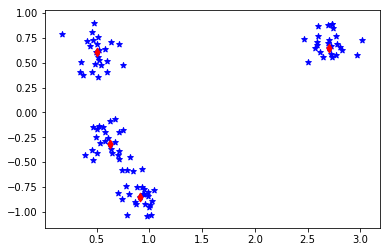

In [18]:
#Primeiro, geramos alguns centroides e uns pontos aos seus redores: 
np.random.seed(seed=101)
somex = np.random.randn(4)
centroids = np.array([[x,np.random.randn()] for x in somex])
X = np.zeros(shape=(104,2))
z = 0
plt.scatter(centroids[:,0],centroids[:,1],c='r',marker='d')
for centroid in centroids:
    X[z] = centroid
    z = z+1
    for i in range(0,25):
        x = 0.12 * np.random.randn() + centroid[0]
        y = 0.12 * np.random.randn() + centroid[1]
        X[z] = [x,y]
        z = z+1
plt.scatter(X[:,0],X[:,1],c='b',marker='*')
plt.scatter(centroids[:,0],centroids[:,1],c='r',marker='d')
       
        
        


In [19]:
model = KMeans(n_clusters=4)


In [20]:
model = model.fit(X)

In [21]:
print(model.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 3 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


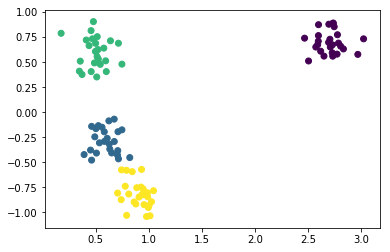

In [22]:
plt.figure()
plt.scatter(X[:,0],X[:,1],c=model.labels_.astype(float))
plt.show()

## KMeans com dados escolares

In [7]:
import pandas as pd
import numpy as np
from sklearn import svm, datasets
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import svm
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [8]:
df = pd.read_csv('evasao.csv')
df.head()

,periodo,bolsa,repetiu,ematraso,disciplinas,faltas,desempenho,abandonou
0,2,0.25,8,1,4,0,0.000000,1
1,2,0.15,3,1,3,6,5.333333,0
2,4,0.10,0,1,1,0,8.000000,0
3,4,0.20,8,1,1,0,4.000000,1
4,1,0.20,3,1,1,1,8.000000,0


In [9]:
df2 = df[['periodo','repetiu','desempenho']][df.abandonou == 1]

In [10]:
df2.head()

,periodo,repetiu,desempenho
0,2,8,0.0
3,4,8,4.0
5,5,2,3.5
7,2,3,4.5
14,3,4,2.5


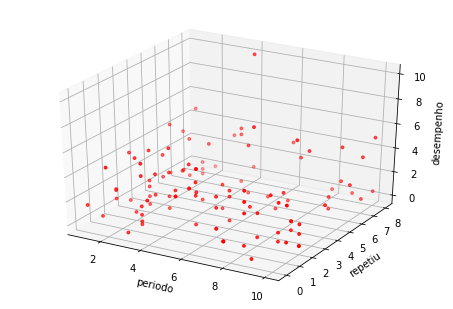

In [11]:
fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
ax = Axes3D(fig) # Para Matplotlib  0.99
ax.scatter(xs=df2['periodo'],ys=df2['repetiu'],zs=df2['desempenho'], c='r',s=8)
ax.set_xlabel('periodo')
ax.set_ylabel('repetiu')
ax.set_zlabel('desempenho')

In [12]:
model_cp = KMeans(n_clusters=4)


Antes de reduzir a escala das variáveis, **verifique se já não estão na mesma escala!** 
É recomendado sempre colocarmos as variáveis na mesma escala, embora nem sempre isso gere o melhor resultado. Vamos começar usando escala e depois sem usarmos escala.

Finalmente, vamos rodar sem fazer escala das variáveis.

[3 3 0 0 0 3 0 2 1 0 2 3 3 3 2 2 2 3 0 3 0 2 2 3 2 1 0 0 2 3 0 0 3 3 1 2 1
 2 2 3 2 3 0 3 1 3 1 2 3 1 0 3 0 2 2 2 1 2 2 1 2 0 2 0 0 1 0 2 1 0 3 3 2 0
 0 1 0 2 0 0 0 0 1 0 0 2 0 3 1 3 0 1 0 2 0 0 0 1 0 3 0 2 1 0 0 2 0 3 2 1 3
 3 0 0 0 2 2 3 3 0 0 2 2]


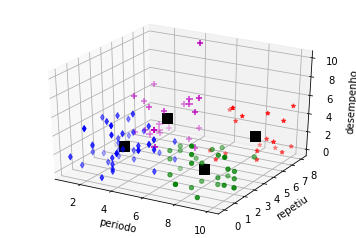

In [13]:
model_cp = model.fit(df2)
cluster_df = df2.assign(cluster = model_cp.labels_)
print(model_cp.labels_)
cluster1 = cluster_df[cluster_df.cluster==0]
cluster2 = cluster_df[cluster_df.cluster==1]
cluster3 = cluster_df[cluster_df.cluster==2]
cluster4 = cluster_df[cluster_df.cluster==3]
fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=cluster1['periodo'],ys=cluster1['repetiu'],zs=cluster1['desempenho'], c='b', marker='d', s=18)
ax.scatter(xs=cluster2['periodo'],ys=cluster2['repetiu'],zs=cluster2['desempenho'], c='r', marker='*', s=18)
ax.scatter(xs=cluster3['periodo'],ys=cluster3['repetiu'],zs=cluster3['desempenho'], c='g', marker='o', s=18)
ax.scatter(xs=cluster4['periodo'],ys=cluster4['repetiu'],zs=cluster4['desempenho'], c='m', marker='+', s=38)
ax.set_xlabel('periodo')
ax.set_ylabel('repetiu')
ax.set_zlabel('desempenho')
ax.scatter(xs=model_cp.cluster_centers_[0,0],ys=model_cp.cluster_centers_[0,1],zs=model_cp.cluster_centers_[0,2], c='k', marker='s', s=100)
ax.scatter(xs=model_cp.cluster_centers_[1,0],ys=model_cp.cluster_centers_[1,1],zs=model_cp.cluster_centers_[1,2], c='k', marker='s', s=100)
ax.scatter(xs=model_cp.cluster_centers_[2,0],ys=model_cp.cluster_centers_[2,1],zs=model_cp.cluster_centers_[2,2], c='k', marker='s', s=100)
ax.scatter(xs=model_cp.cluster_centers_[3,0],ys=model_cp.cluster_centers_[3,1],zs=model_cp.cluster_centers_[3,2], c='k', marker='s', s=100)


Faz mas sentido rodar a clusterização sem transformar as variáveis, pois já estão na mesma escala. 